In [8]:
%%capture
%pip install --upgrade pip
%pip install pandas numpy seaborn matplotlib



In [30]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

print("Current Working Directory:", os.getcwd())
print("Files in this Directory:", os.listdir('.'))

csv_file = "heart_failure_clinical_records_with_severity.csv"

try:
    df = pd.read_csv(csv_file)
    print(f"\nSuccessfully loaded '{csv_file}'")
except FileNotFoundError as e:
    print(f"\n** ERROR: {csv_file} not found. **\n")
    raise e



Current Working Directory: c:\Users\lukeb\DataminingAssingment3
Files in this Directory: ['Assingment3.ipynb', 'heart_failure_clinical_records_with_severity.csv']

Successfully loaded 'heart_failure_clinical_records_with_severity.csv'


In [31]:
# ------------------------------------------------------------------------------------
# 2. Task 1.1: Basic EDA
# ------------------------------------------------------------------------------------
print("\n--- Basic EDA ---")


print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nDataset Shape (rows, columns):", df.shape)


print("\nColumn Names:")
print(df.columns.tolist())


print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nSummary Statistics (Numeric Columns):")
display(df.describe())


--- Basic EDA ---

First 5 rows of the dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Severity
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,6.6
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,6.4
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,4.6
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,8.8



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  Severity                  299 non-null    float64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Severity
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,3.107692
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,1.804331
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,1.800000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,2.600000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,4.300000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,8.800000


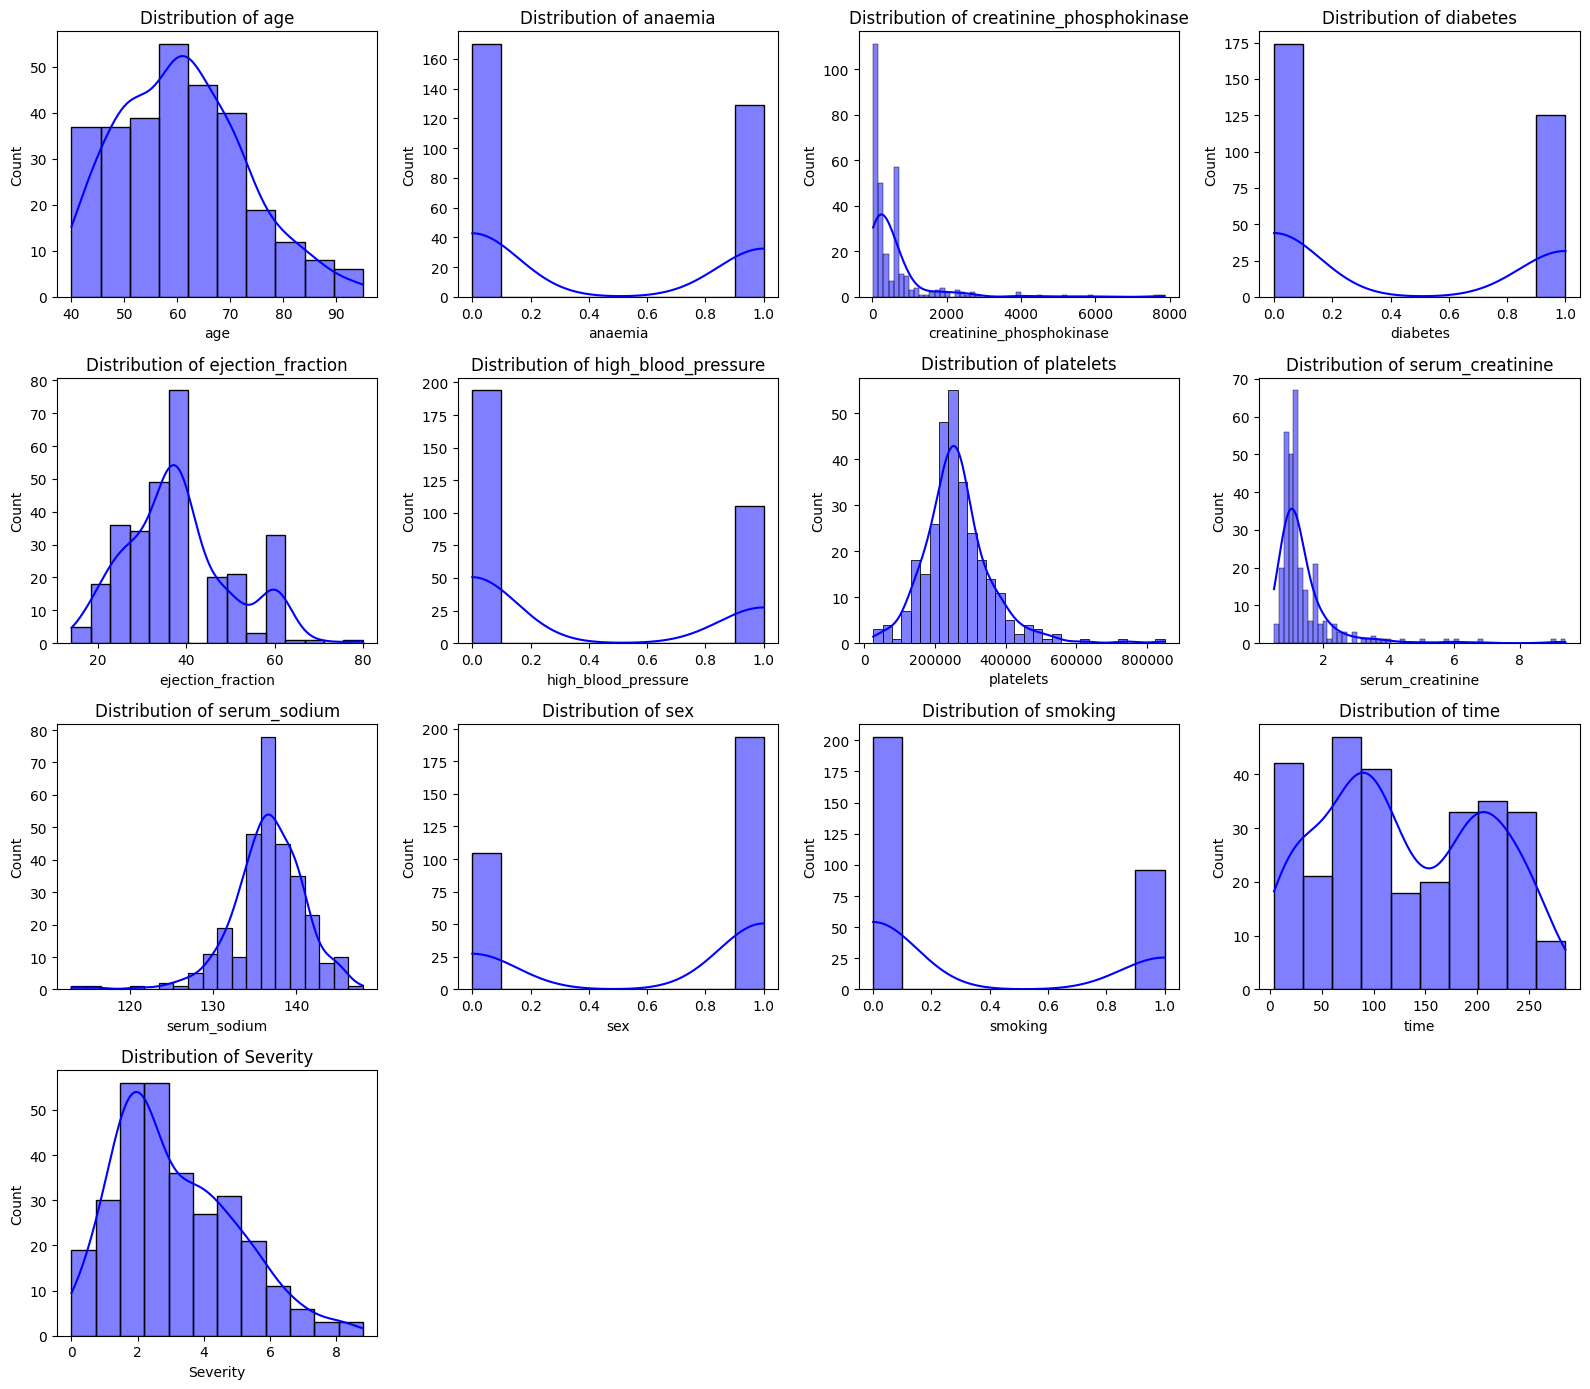

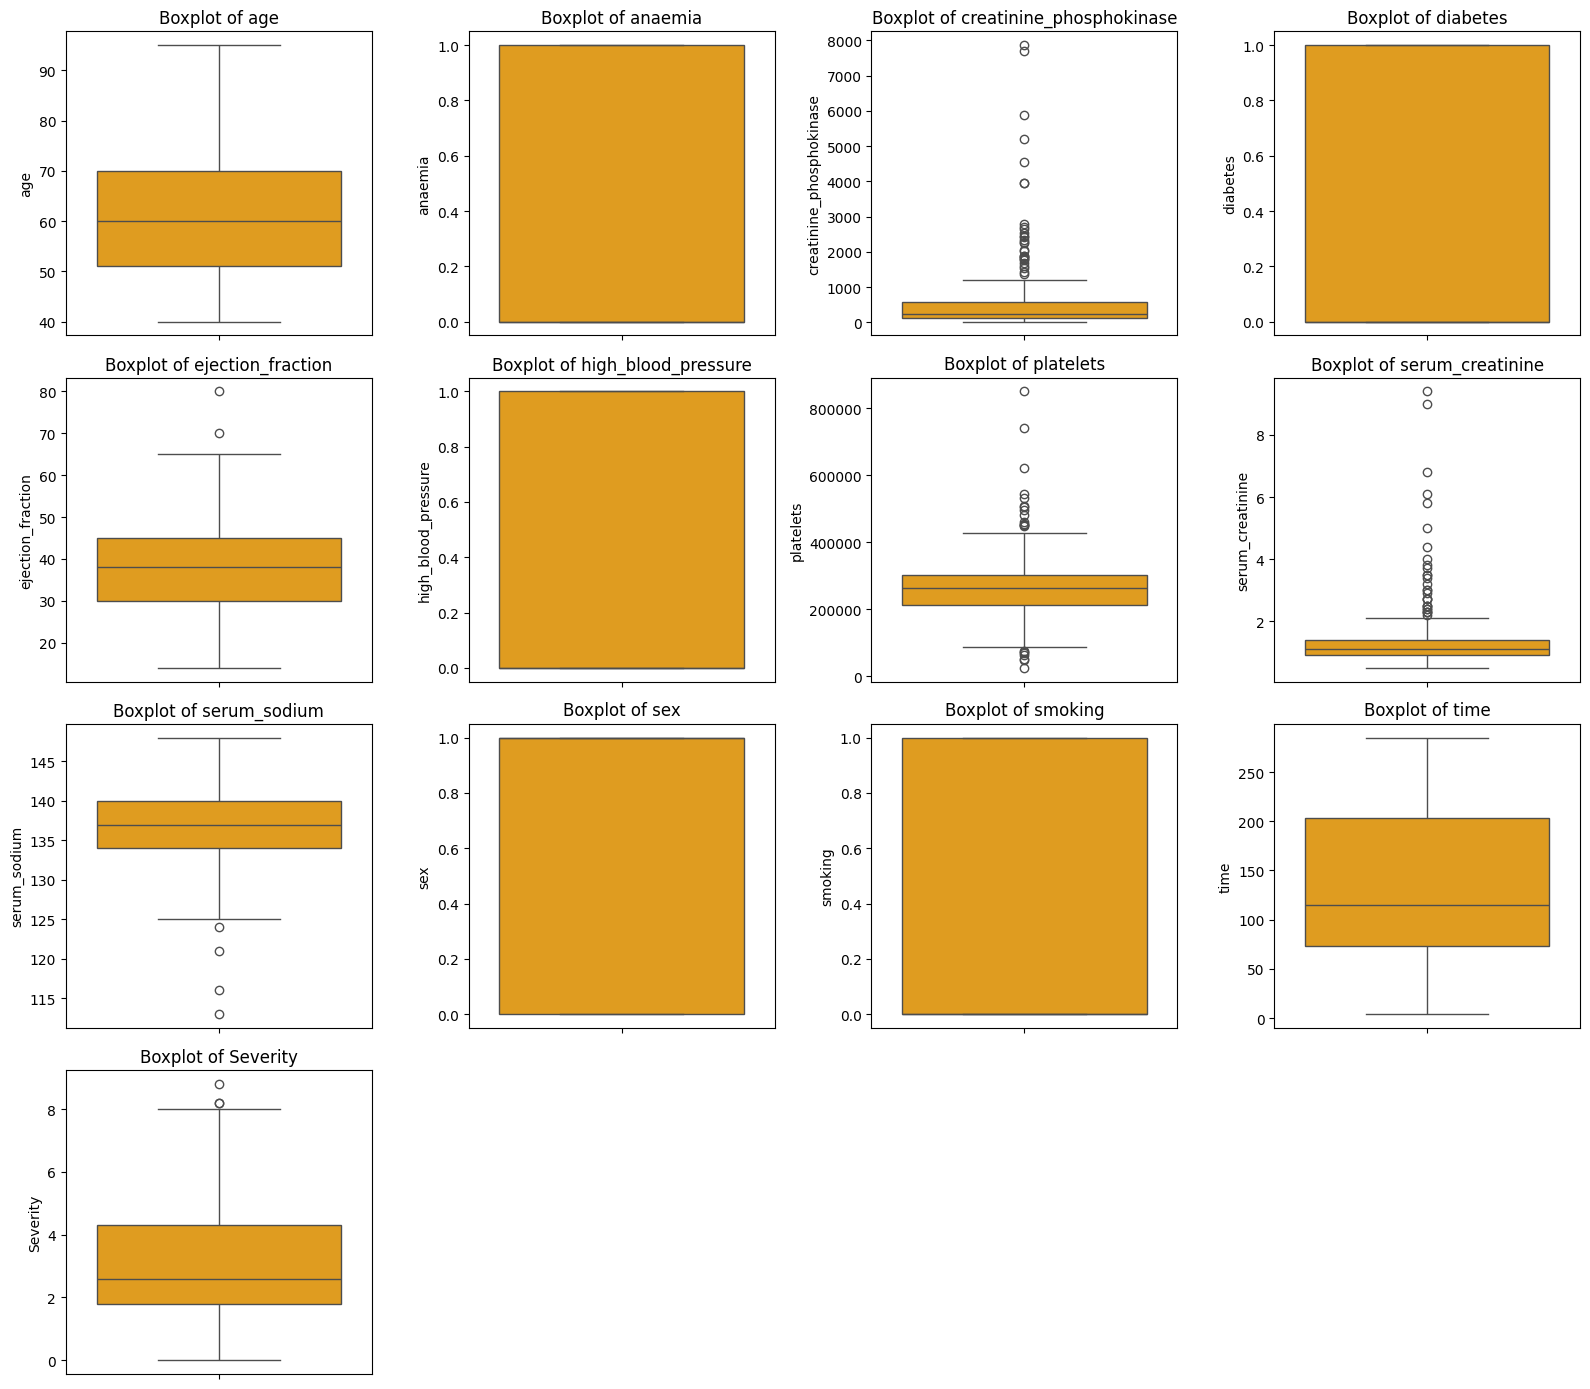

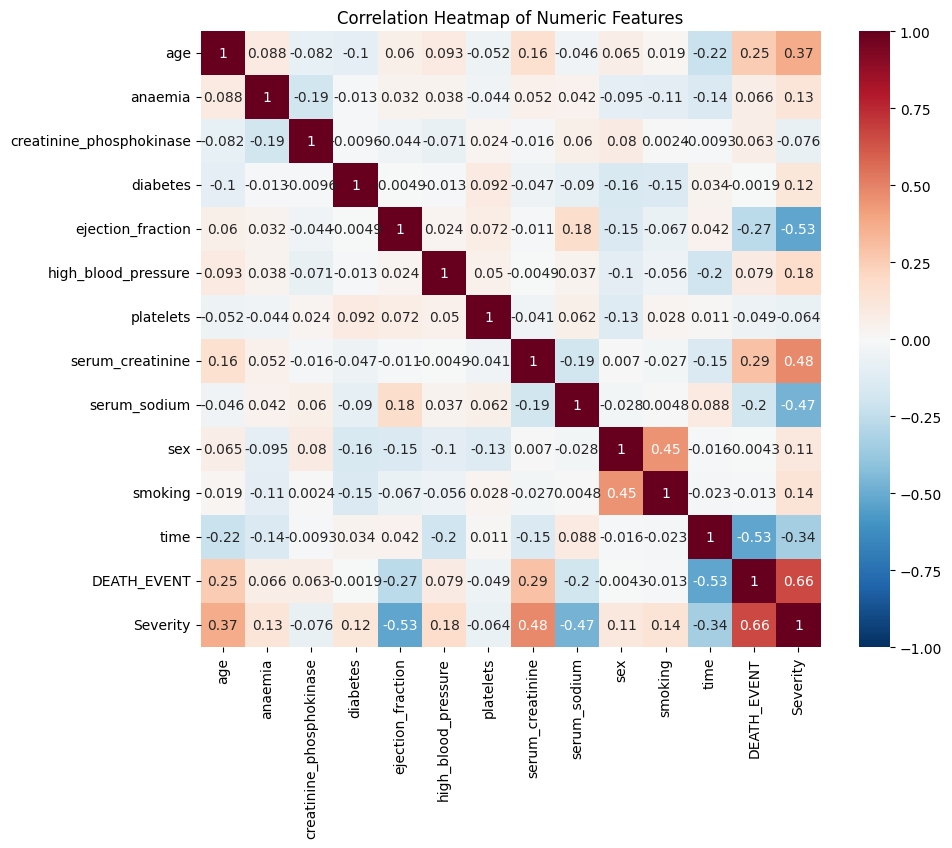

In [ ]:
# ------------------------------------------------------------------------------------
# Task 1.2: Visualization of the Dataset
#     - Histograms for numeric features
#     - Boxplots for numeric features
#     - Correlation heatmap
# ------------------------------------------------------------------------------------

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['DEATH_EVENT']
numeric_features = [col for col in numeric_cols if col not in exclude_cols]


# Histograms for each feature
plt.figure(figsize=(16, 14))  # 4x4 grid suits up to 16 plots
for i, col in enumerate(numeric_features, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


#Boxplots for each feature
plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_features, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# 3) Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



--- Pairplot ---


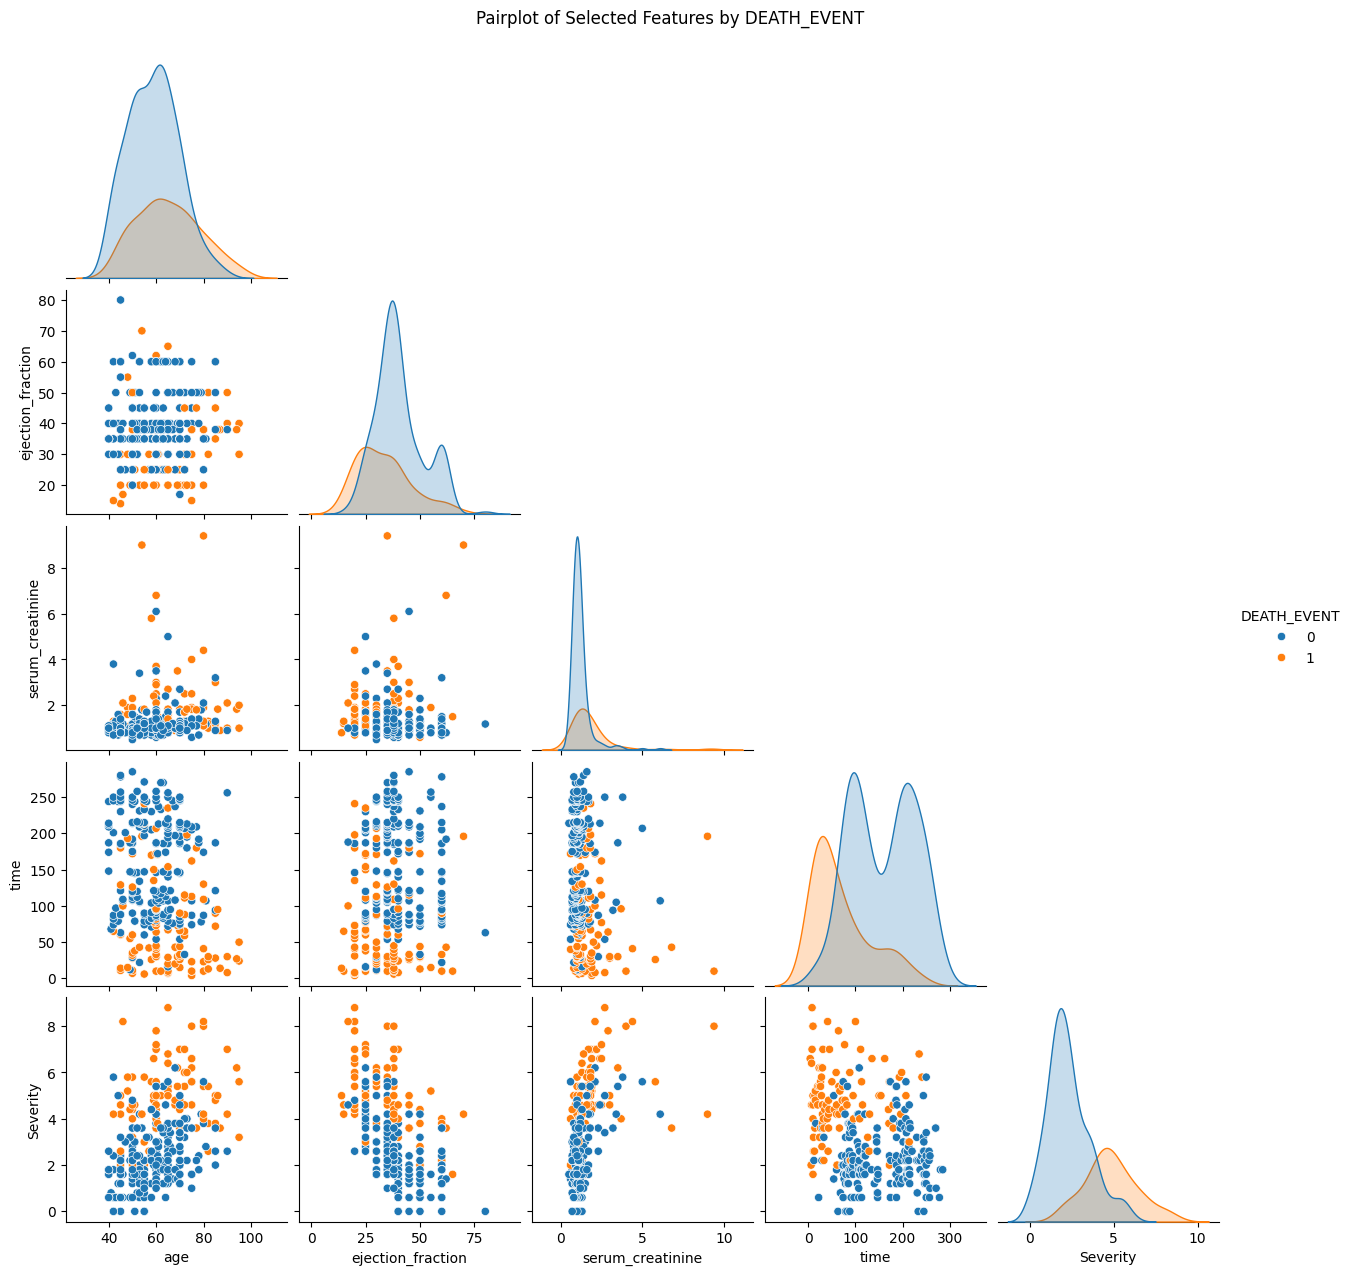


--- EDA Complete ---


In [33]:
# ------------------------------------------------------------------------------------
# 4. Task 1.3: Pairplot by 'DEATH_EVENT'
# ------------------------------------------------------------------------------------
print("\n--- Pairplot ---")
subset_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'time', 'Severity', 'DEATH_EVENT']

#pairplot
sns.pairplot(df[subset_cols], hue='DEATH_EVENT', corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by DEATH_EVENT", y=1.02)
plt.show()

print("\n--- EDA Complete ---")


## Task 2

In [14]:
%pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 11.1/11.1 MB 63.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   -------------------- ------------------- 20.7/41.2 MB 93.4 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.2 MB 96.3 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 84.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
# ------------------------------------------------------------------------------------
# Task 2.1: Split the Dataset into Training and Testing Sets for Regression
# ------------------------------------------------------------------------------------
# We will predict "Severity" using the other clinical features, ignoring 'DEATH_EVENT'.
# ------------------------------------------------------------------------------------
#  features (X) and target (y)
X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["Severity"]

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):   ", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (239, 12) (239,)
Testing set shape (X_test, y_test):    (60, 12) (60,)


In [39]:
# ------------------------------------------------------------------------------------
# Task 2.2: Perform Linear Regression to Predict 'Severity'
# ------------------------------------------------------------------------------------

# Define Features (X) and Target (y), ignoring 'DEATH_EVENT'
X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["Severity"]

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    
    random_state=42   
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):   ", X_test.shape, y_test.shape, "\n")

# Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions on the Test Set
y_pred = lin_reg.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Model Evaluation ===")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Training set shape (X_train, y_train): (239, 12) (239,)
Testing set shape (X_test, y_test):    (60, 12) (60,) 

=== Linear Regression Model Evaluation ===
Coefficients: [ 4.49324281e-02  3.72031166e-01 -5.62304573e-05  6.40206293e-01
 -7.40208547e-02  6.19462311e-01 -1.85532879e-08  7.00441868e-01
 -1.22595581e-01 -9.38938975e-02  7.43026854e-01 -2.88457046e-03]
Intercept: 18.510014760487945
Mean Squared Error (MSE): 0.8519367430565101
R-squared (R2): 0.7299924750235556


In [41]:
# ------------------------------------------------------------------------------------
# Task 2.3: Implement Ridge Regression to Predict 'Severity'
# ------------------------------------------------------------------------------------

X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):   ", X_test.shape, y_test.shape, "\n")

# Train the Ridge Regression Model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

#Predictions on the Test Set
y_pred_ridge = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== Ridge Regression Model Evaluation ===")
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2):", r2_ridge)


Training set shape (X_train, y_train): (239, 12) (239,)
Testing set shape (X_test, y_test):    (60, 12) (60,) 

=== Ridge Regression Model Evaluation ===
Coefficients: [ 4.48788040e-02  3.63566292e-01 -5.78308630e-05  6.25952353e-01
 -7.39912594e-02  6.05784779e-01 -1.01829152e-08  6.95954516e-01
 -1.22742228e-01 -8.65183580e-02  7.20644106e-01 -2.91172953e-03]
Intercept: 18.55725466197184
Mean Squared Error (MSE): 0.8440732876559948
R-squared (R2): 0.7324846695999256


In [43]:
# ------------------------------------------------------------------------------------
# Task 2.4: Implement Lasso Regression to Predict 'Severity' and Identify Important Features
# ------------------------------------------------------------------------------------

X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["Severity"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):   ", X_test.shape, y_test.shape, "\n")

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)


y_pred_lasso = lasso_reg.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression Model Evaluation ===")
print("Coefficients:", lasso_reg.coef_)
print("Intercept:", lasso_reg.intercept_)
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2):", r2_lasso)

#Identify Important Features 
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Lasso_Coefficient": lasso_reg.coef_
})
# Calc absolute values for sorting by importance
coef_df["Absolute_Coefficient"] = coef_df["Lasso_Coefficient"].abs()
coef_df.sort_values("Absolute_Coefficient", ascending=False, inplace=True)

print("\n=== Feature Importance (by Magnitude of Lasso Coefficients) ===")
display(coef_df)

important_features = coef_df[coef_df["Lasso_Coefficient"] != 0]["Feature"].tolist()
print("\nNon-zero Coefficients => Likely Important Features:")
print(important_features)


Training set shape (X_train, y_train): (239, 12) (239,)
Testing set shape (X_test, y_test):    (60, 12) (60,) 

=== Lasso Regression Model Evaluation ===
Coefficients: [ 4.03784879e-02  0.00000000e+00 -1.26215478e-04  0.00000000e+00
 -6.59710435e-02  0.00000000e+00 -2.49489589e-07  0.00000000e+00
 -1.07762091e-01  0.00000000e+00  0.00000000e+00 -5.01858948e-03]
Intercept: 18.623692385200144
Mean Squared Error (MSE): 1.2975789302097414
R-squared (R2): 0.5887534159513587

=== Feature Importance (by Magnitude of Lasso Coefficients) ===


,Feature,Lasso_Coefficient,Absolute_Coefficient
8,serum_sodium,-1.077621e-01,1.077621e-01
4,ejection_fraction,-6.597104e-02,6.597104e-02
0,age,4.037849e-02,4.037849e-02
11,time,-5.018589e-03,5.018589e-03
2,creatinine_phosphokinase,-1.262155e-04,1.262155e-04
6,platelets,-2.494896e-07,2.494896e-07
3,diabetes,0.000000e+00,0.000000e+00
1,anaemia,0.000000e+00,0.000000e+00
7,serum_creatinine,0.000000e+00,0.000000e+00
5,high_blood_pressure,0.000000e+00,0.000000e+00



Non-zero Coefficients => Likely Important Features:
['serum_sodium', 'ejection_fraction', 'age', 'time', 'creatinine_phosphokinase', 'platelets']


In [45]:
# ------------------------------------------------------------------------------------
# Task 2.5: Extend Analysis by Applying Kernel Regression (Kernel Ridge) with
#           Different Kernel Types: linear, polynomial, RBF
# ------------------------------------------------------------------------------------

X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["Severity"]


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):   ", X_test.shape, y_test.shape, "\n")

# List of kernels to explore
kernels = ["linear", "poly", "rbf"]

#Apply Kernel Ridge Regression with each kernel
for kernel_type in kernels:
    if kernel_type == "poly":
        model = KernelRidge(alpha=1.0, kernel=kernel_type, degree=2, gamma=0.1)
    elif kernel_type == "rbf":
        model = KernelRidge(alpha=1.0, kernel=kernel_type, gamma=0.1)
    else:
        model = KernelRidge(alpha=1.0, kernel=kernel_type)
    

    model.fit(X_train, y_train)
    
    #Predict on the Test Set
    y_pred = model.predict(X_test)
    
    #Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"=== Kernel Ridge with '{kernel_type}' Kernel ===")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):         ", r2)
    print("-------------------------------------------------\n")


Training set shape (X_train, y_train): (239, 12) (239,)
Testing set shape (X_test, y_test):    (60, 12) (60,) 

=== Kernel Ridge with 'linear' Kernel ===
Mean Squared Error (MSE): 1.154237179460181
R-squared (R2):          0.6341832576163895
-------------------------------------------------

=== Kernel Ridge with 'poly' Kernel ===
Mean Squared Error (MSE): 4.548339373250398
R-squared (R2):          -0.4415223511997206
-------------------------------------------------

=== Kernel Ridge with 'rbf' Kernel ===
Mean Squared Error (MSE): 13.97933333001527
R-squared (R2):          -3.4305228340266236
-------------------------------------------------



c:\Users\lukeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [46]:
# ------------------------------------------------------------------------------------
# Task 2.6: Evaluate the performance of all regression models using MSE and R-squared
# ------------------------------------------------------------------------------------
import pandas as pd

# Metrics from previous tasks
# 2.2 Linear Regression
lin_mse = 0.8519367430565101
lin_r2  = 0.7299924750235556

# 2.3 Ridge Regression
ridge_mse = 0.8440732876559948
ridge_r2  = 0.7324846695999256

# 2.4 Lasso Regression
lasso_mse = 1.2975789302097414
lasso_r2  = 0.5887534159513587

# 2.5 Kernel Ridge (linear, poly, rbf)
kr_lin_mse  = 1.154237179460181
kr_lin_r2   = 0.6341832576163895

kr_poly_mse = 4.548339373250398
kr_poly_r2  = -0.4415223511997206

kr_rbf_mse  = 13.97933333001527
kr_rbf_r2   = -3.4305228340266236

# 1) holds all results 
perf_data = {
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Kernel Ridge (linear)",
        "Kernel Ridge (poly)",
        "Kernel Ridge (RBF)"
    ],
    "MSE": [
        lin_mse,
        ridge_mse,
        lasso_mse,
        kr_lin_mse,
        kr_poly_mse,
        kr_rbf_mse
    ],
    "R2": [
        lin_r2,
        ridge_r2,
        lasso_r2,
        kr_lin_r2,
        kr_poly_r2,
        kr_rbf_r2
    ]
}

# 2) Convert the dictionary to a DataFrame
results_df = pd.DataFrame(perf_data)

# 3) Display or print the DataFrame
print("=== Comparison of Regression Model Performance ===")
display(results_df)



=== Comparison of Regression Model Performance ===


,Model,MSE,R2
0,Linear Regression,0.851937,0.729992
1,Ridge Regression,0.844073,0.732485
2,Lasso Regression,1.297579,0.588753
3,Kernel Ridge (linear),1.154237,0.634183
4,Kernel Ridge (poly),4.548339,-0.441522
5,Kernel Ridge (RBF),13.979333,-3.430523


## 2.7 Discussion: Strengths and Weaknesses of Linear, Ridge, and Kernel Regression

### 1. Linear Regression
- **Strengths**:
  - Easy to interpret and implement.
  - Fast training time and minimal complexity.
  - Provides direct insight into how features affect predictions via coefficients.
- **Weaknesses**:
  - Susceptible to overfitting if features are highly correlated or if the dataset is small.
  - Does not inherently handle complex, non-linear relationships.

### 2. Ridge Regression
- **Strengths**:
  - Mitigates overfitting by adding L2 regularization, shrinking coefficients toward zero.
  - Generally offers better generalization than plain Linear Regression when there are many features.
  - Still interpretable as it retains all features with small (but non-zero) coefficients.
- **Weaknesses**:
  - Coefficients are never fully driven to zero, so it may not simplify the model as effectively as Lasso in terms of feature elimination.
  - Like Linear Regression, Ridge is still a linear model unless combined with kernel methods.

### 3. Kernel Regression (via Kernel Ridge)
- **Strengths**:
  - Can capture non-linear relationships in the data by using kernels (e.g., polynomial, RBF).
  - Extends Ridge Regression to more flexible decision boundaries.
- **Weaknesses**:
  - Performance heavily depends on hyperparameters (e.g., `alpha`, `degree`, `gamma`).
  - Can be computationally expensive for large datasets, especially with kernel computations.
  - Default hyperparameters may lead to poor performance if not tuned properly.

**Overall**, Ridge Regression performed slightly better than Linear Regression in our analysis, indicating that a bit of regularization was helpful for generalization. Plain Linear Regression still performed well, showing that the relationship between features and `Severity` may be mostly linear. Kernel Ridge with default parameters did not outperform the simpler models, likely because those kernels need **hyperparameter tuning** to capture more complex patterns effectively.



## TASK 3

In [50]:
# ------------------------------------------------------------------------------------
# Optimized Logistic Regression for Predicting 'DEATH_EVENT'
# ------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("heart_failure_clinical_records_with_severity.csv")

# Separate features (X) and target (y), ignoring 'Severity'
X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["DEATH_EVENT"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape, "\n")

#  Scaling -> Logistic Regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500))  
])

# parameter grid for hyperparameter tuning
param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],      
    "logreg__solver": ["liblinear", "lbfgs"], 
}

#Perform GridSearchCV 
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,               
    scoring="accuracy", 
    n_jobs=-1           
)

#Train the model with all parameter combinations
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Val Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\n=== Optimized Logistic Regression Performance ===")
print("Test Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Train set shape: (239, 12) (239,)
Test set shape:  (60, 12) (60,) 

Best Parameters: {'logreg__C': 0.01, 'logreg__solver': 'liblinear'}
Best Cross-Val Accuracy: 0.8408687943262411

=== Optimized Logistic Regression Performance ===
Test Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



In [51]:
# ------------------------------------------------------------------------------------
# Optimized Comparison of Logistic Regression, SVM, Random Forest, and Naive Bayes
# for Predicting 'DEATH_EVENT' (Ignoring 'Severity')
# ------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("heart_failure_clinical_records_with_severity.csv")


X = df.drop(["DEATH_EVENT", "Severity"], axis=1)
y = df["DEATH_EVENT"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape, "\n")

#classifiers and parameter grids
classifiers_with_params = [
    {
        "name": "Logistic Regression",
        "model": LogisticRegression(max_iter=500),
        "param_grid": {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__solver": ["liblinear", "lbfgs"]
        }
    },
    {
        "name": "Support Vector Machine",
        "model": SVC(),
        "param_grid": {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__kernel": ["linear", "rbf"], 
            "clf__gamma": [0.01, 0.1, 1]
        }
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "clf__n_estimators": [50, 100],
            "clf__max_depth": [None, 5, 10],
            "clf__min_samples_split": [2, 5]
        }
    },
    {
        "name": "Naive Bayes",
        "model": GaussianNB(),
        # GaussianNB has fewer common hyperparameters, but var_smoothing is one:
        "param_grid": {
            "clf__var_smoothing": [1e-09, 1e-08, 1e-07]
        }
    }
]

#Loop over each classifier, tune hyperparameters,evaluate
results = []
for item in classifiers_with_params:
    name = item["name"]
    model = item["model"]
    param_grid = item["param_grid"]
    

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    

    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,          
        n_jobs=-1      
    )
    
    grid_search.fit(X_train, y_train)
    

    best_estimator = grid_search.best_estimator_
    

    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "CV Accuracy": round(grid_search.best_score_, 3),
        "Test Accuracy": round(accuracy, 3)
    })
    
    # Print classification report
    print(f"=== {name} ===")
    print("Best Params:", grid_search.best_params_)
    print("Cross-Val Accuracy:", round(grid_search.best_score_, 3))
    print("Test Accuracy:", round(accuracy, 3))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

#Create a summary DataFrame of all results
results_df = pd.DataFrame(results)
print("\n=== Summary of Tuned Model Performance ===")
display(results_df)



Train set shape: (239, 12) (239,)
Test set shape:  (60, 12) (60,) 

=== Logistic Regression ===
Best Params: {'clf__C': 0.01, 'clf__solver': 'liblinear'}
Cross-Val Accuracy: 0.841
Test Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

--------------------------------------------------
=== Support Vector Machine ===
Best Params: {'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel': 'linear'}
Cross-Val Accuracy: 0.824
Test Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro 

,Model,Best Params,CV Accuracy,Test Accuracy
0,Logistic Regression,"{'clf__C': 0.01, 'clf__solver': 'liblinear'}",0.841,0.800
1,Support Vector Machine,"{'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel...",0.824,0.800
2,Random Forest,"{'clf__max_depth': 5, 'clf__min_samples_split'...",0.891,0.717
3,Naive Bayes,{'clf__var_smoothing': 1e-09},0.782,0.700


In [52]:
# ------------------------------------------------------------------------------------
# Task 3.3: Evaluate Classification Models (Logistic Regression, SVM, Random Forest,
#           Naive Bayes) using Accuracy, Precision, and Recall
# ------------------------------------------------------------------------------------
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

for name, clf in classifiers.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec  = recall_score(y_test, y_pred, pos_label=1)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3)
    })

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.80,0.933,0.56
1,Support Vector Machine,0.75,0.857,0.48
2,Random Forest,0.75,0.857,0.48
3,Naive Bayes,0.70,0.818,0.36


## 3.4 Discussion: Effectiveness of Different Classifiers in Predicting Patient Mortality

Below is a concise discussion summarizing the performance of the classifiers we tested for predicting `DEATH_EVENT`:

1. **Logistic Regression**  
   - **Strengths**:  
     - Easy to interpret: coefficients directly relate features to mortality risk.  
     - Achieved the highest accuracy (≈80%) and high precision on our dataset.  
   - **Weaknesses**:  
     - Recall (ability to catch all positive cases) was moderate, meaning some actual deaths were missed.  
     - It may need additional tuning or rebalancing of the dataset to improve recall.

2. **Support Vector Machine (SVM)**  
   - **Strengths**:  
     - Powerful algorithm for both linear and non-linear classification (if using kernels).  
     - Performed close to Logistic Regression in accuracy (≈75–80%).  
   - **Weaknesses**:  
     - May require extensive hyperparameter tuning (e.g., `C`, `gamma`, kernel) to improve performance.  
     - Not as straightforward to interpret compared to Logistic Regression.

3. **Random Forest**  
   - **Strengths**:  
     - Handles complex interactions between features.  
     - Can measure feature importance directly.  
   - **Weaknesses**:  
     - Default settings gave lower test accuracy (≈70–75%) here.  
     - Tends to need careful tuning of parameters (e.g., number of trees, max depth) and may overfit if not monitored.

4. **Naïve Bayes**  
   - **Strengths**:  
     - Very fast and simple probabilistic approach.  
     - Works surprisingly well with smaller datasets or many input features.  
   - **Weaknesses**:  
     - Assumes independence among features, which can limit real-world performance.  
     - Showed lower accuracy (≈70%) and recall, suggesting more missed positive cases.

### Overall Observations
- **Logistic Regression** and **SVM** emerged as the top performers in our experiments, both reaching around **80%** accuracy.  
- **Random Forest** and **Naïve Bayes** had lower accuracies, possibly due to **default or limited hyperparameter tuning**. Further optimization could improve their results.  
- Each classifier balances **precision**, **recall**, and **interpretability** differently. For instance, Logistic Regression gives clear insight into feature contributions but may not capture complex patterns as well as a Random Forest.  
- Ultimately, the best model choice can depend on clinical requirements:
  - **High Recall**: If missing potential deaths is critical, adjusting decision thresholds or focusing on recall is vital.  
  - **High Precision**: If false alarms are very costly, a model with fewer false positives may be preferable.

Continued **hyperparameter tuning**, **feature engineering**, and **class balancing** techniques (e.g., oversampling or adjusting class weights) could further enhance these results.


## Conclusion

In this assignment, we explored a heart failure dataset to predict both **Severity** (through regression) and **DEATH_EVENT** (through classification). Our steps included:

- **Exploratory Data Analysis (EDA)**: Investigated feature distributions, correlations, and outliers.  
- **Regression Approaches**: Evaluated Linear, Ridge, Lasso, and Kernel-based models for predicting `Severity`. Ridge Regression performed slightly better than Linear Regression, while Lasso highlighted key features. Kernel methods showed potential but required hyperparameter tuning for optimal results.  
- **Classification Approaches**: Trained Logistic Regression, SVM, Random Forest, and Naïve Bayes to predict `DEATH_EVENT`. Logistic Regression and SVM generally achieved the best balance of accuracy, precision, and recall. Further tuning and feature engineering could improve model performance.

Overall, this workflow demonstrates how multiple modeling strategies can be combined with domain insights to address clinical prediction tasks in heart failure.
